### Monday Task - Round 1

In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from sklearn.datasets import load_boston

In [7]:
df = pd.read_csv("Data_Marketing_Customer_Analysis_Round3.csv")


FileNotFoundError: [Errno 2] No such file or directory: 'Data_Marketing_Customer_Analysis_Round3.csv'

In [8]:
numercials_df=df.select_dtypes(np.number)###import numerical columns from the dataframe
categoricals_df= df.select_dtypes(np.object)#### import categorical columns from the dataframe

NameError: name 'df' is not defined

In [8]:
df.corr()###correlation b/w the input features

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
customer_lifetime_value,1.000000,0.003732,0.404235,0.011912,0.017055,-0.032371,0.016789,0.232849
income,0.003732,1.000000,-0.002431,-0.026564,0.003846,0.018903,-0.004461,-0.111221
monthly_premium_auto,0.404235,-0.002431,1.000000,0.010036,0.019696,-0.008811,-0.018805,0.630149
months_since_last_claim,0.011912,-0.026564,0.010036,1.000000,-0.034086,0.001204,0.000814,0.013874
months_since_policy_inception,0.017055,0.003846,0.019696,-0.034086,1.000000,0.002554,-0.009719,0.004186
number_of_open_complaints,-0.032371,0.018903,-0.008811,0.001204,0.002554,1.000000,-0.000303,-0.010668
number_of_policies,0.016789,-0.004461,-0.018805,0.000814,-0.009719,-0.000303,1.000000,-0.008019
total_claim_amount,0.232849,-0.111221,0.630149,0.013874,0.004186,-0.010668,-0.008019,1.000000


In [9]:
######X-y split (y is the target variable, which is the total claim amount)

X = numercials_df.drop('total_claim_amount', axis=1)
y = numercials_df.total_claim_amount

In [12]:
X.isna().any()

customer_lifetime_value          False
income                           False
monthly_premium_auto             False
months_since_last_claim          False
months_since_policy_inception    False
number_of_open_complaints        False
number_of_policies               False
dtype: bool

In [14]:
y.isna().any()

False

In [15]:
#######Train-test split.

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

RAND_STATE = 100 # for reproducible shuffling
TT_RATIO = 0.3 # test/train

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.head(3)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
861,5908,86277,74,19,33,0,3
9053,2397,22283,65,16,93,0,1
9515,5296,96510,73,33,44,0,3


In [17]:
from sklearn.preprocessing import StandardScaler #fit and transform the train 

In [19]:
scaler = StandardScaler()

In [20]:
X_train_scaled= scaler.fit_transform(X_train)

In [21]:
X_test_scaled = scaler.transform(X_test)

In [22]:
model=LinearRegression()    # model
model.fit(X_train_scaled, y_train)   # model train ###calculating the parameter

LinearRegression()

LinearRegression()

In [23]:
model.coef_

array([ -6.1418607 , -31.72677744, 186.29158041,   1.66182273,
        -1.47924562,  -2.21387573,   3.24168968])

In [24]:
model.intercept_

434.8695535952954

In [25]:

y_pred = pd.DataFrame(model.predict(X_test_scaled),columns = ['total_claim_amount'] )      # model prediction
y_pred_train =  pd.DataFrame(model.predict(X_train_scaled),columns = ['total_claim_amount'])

In [ ]:
############

In [26]:
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

print(mse(y_test,y_pred))
print(mae(y_test,y_pred))
##prediction on the train set
print(mse(y_train,y_pred_train))

50661.021566839234
152.90695179363988
50466.29164229992


In [28]:
R2=r2_score(y_test,y_pred)
R2

0.4117569034386489

In [29]:
R2_test=model.score(X_test_scaled,y_test)
R2_train=model.score(X_train_scaled,y_train)
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

0.41046971941991517

In [30]:
####feature importance

features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_.reshape(len(X_train.columns),))
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)
features_importances

,Attribute,Importance
2,monthly_premium_auto,186.291580
1,income,31.726777
0,customer_lifetime_value,6.141861
6,number_of_policies,3.241690
5,number_of_open_complaints,2.213876
3,months_since_last_claim,1.661823
4,months_since_policy_inception,1.479246


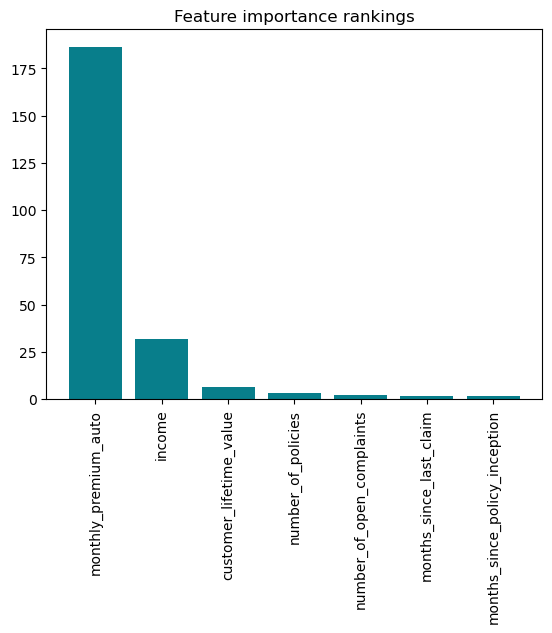

In [31]:
plt.bar(x=features_importances['Attribute'].iloc[:10], height=features_importances['Importance'].iloc[:10], color='#087E8B')
plt.title('Feature importance rankings', size=12)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
#######Please rerun the model after adding the hot encoded categorical variables as well as other numeric 
###categroical variables (e.g. number of open complaintes).

In [32]:
from sklearn import preprocessing
labelencoder = preprocessing.LabelEncoder()
from sklearn.preprocessing import OneHotEncoder

In [33]:
categoricals_df.head()

,region,response,coverage,education,effective_to_date,month,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,central,no,basic,college,2/18/11,feb,employed,m,suburban,married,corporate auto,corporate l3,offer3,agent,four-door car,medsize
1,west region,no,basic,college,1/18/11,jan,unemployed,f,suburban,single,personal auto,personal l3,offer4,call center,four-door car,medsize
2,east,no,basic,bachelor,2/10/11,feb,employed,m,suburban,single,personal auto,personal l3,offer3,call center,suv,medsize
3,north west,yes,extended,college,1/11/11,jan,employed,m,suburban,single,corporate auto,corporate l3,offer2,branch,four-door car,medsize
4,north west,no,premium,bachelor,1/17/11,jan,medical leave,f,suburban,married,personal auto,personal l2,offer1,branch,four-door car,medsize


In [34]:
numercials_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,4809,48029,61,7,52,0,9,292
1,2228,92260,64,3,26,0,1,744
2,14947,22139,100,34,31,0,2,480
3,22332,49078,97,10,3,0,2,484
4,9025,23675,117,33,31,0,7,707


In [35]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

categoricals_df.coverage = le.fit_transform(categoricals_df.coverage)
categoricals_df.education = le.fit_transform(categoricals_df.education)
categoricals_df.vehicle_class = le.fit_transform(categoricals_df.vehicle_class)
categoricals_df.vehicle_size = le.fit_transform(categoricals_df.vehicle_size)

In [36]:
categorical = pd.get_dummies(categoricals_df, prefix = ['month', 'region','response', 'employment_status', 'gender', 'location_code', 'policy_type', 'marital_status','policy', 'renew_offer_type', 'sales_channel'], columns = ['month', 'region','response', 'employment_status', 'gender', 'policy_type', 'location_code', 'marital_status', 'policy', 'renew_offer_type', 'sales_channel'], drop_first=False)
###categorical['region']=labelencoder.fit_transform(categorical['region'])
##categorical['coverage']=labelencoder.fit_transform(categorical['coverage'])
#categorical['education']=labelencoder.fit_transform(categorical['education'])
#categorical['employment_status']=labelencoder.fit_transform(categorical['employment_status'])
#categorical['location_code']=labelencoder.fit_transform(categorical['location_code'])
#categorical['marital_status']=labelencoder.fit_transform(categorical['marital_status'])
#categorical['sales_channel']=labelencoder.fit_transform(categorical['sales_channel'])
#categorical['vehicle_class']=labelencoder.fit_transform(categorical['vehicle_class'])
#categorical['vehicle_size']=labelencoder.fit_transform(categorical['vehicle_size'])
#categorical['policy_type']=labelencoder.fit_transform(categorical['policy_type'])

In [37]:
categorical=categorical.drop(['effective_to_date'], axis=1)

In [38]:
df=pd.concat([categorical,numercials_df],axis=1)
df

,coverage,education,vehicle_class,vehicle_size,month_feb,month_jan,region_central,region_east,region_north west,region_west region,response_no,response_yes,employment_status_disabled,employment_status_employed,employment_status_medical leave,employment_status_retired,employment_status_unemployed,gender_f,gender_m,location_code_corporate auto,location_code_personal auto,location_code_special auto,policy_type_rural,policy_type_suburban,policy_type_urban,marital_status_divorced,marital_status_married,marital_status_single,policy_corporate l1,policy_corporate l2,policy_corporate l3,policy_personal l1,policy_personal l2,policy_personal l3,policy_special l1,policy_special l2,policy_special l3,renew_offer_type_offer1,renew_offer_type_offer2,renew_offer_type_offer3,renew_offer_type_offer4,sales_channel_agent,sales_channel_branch,sales_channel_call center,sales_channel_web,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0,1,0,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,4809,48029,61,7,52,0,9,292
1,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,2228,92260,64,3,26,0,1,744
2,0,0,4,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,14947,22139,100,34,31,0,2,480
3,1,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,22332,49078,97,10,3,0,2,484
4,2,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,9025,23675,117,33,31,0,7,707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10684,2,0,1,1,0,1,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,15563,61541,253,12,40,0,7,1214
10685,0,1,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,5259,61146,65,7,68,0,6,273
10686,1,0,2,1,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,23893,39837,201,11,63,0,2,381
10687,2,1,4,1,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,11971,64195,158,0,27,4,6,618


In [39]:
X = df.drop('total_claim_amount', axis=1)
y = df.total_claim_amount

In [40]:
#######Train-test split.

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

RAND_STATE = 100 # for reproducible shuffling
TT_RATIO = 0.3 # test/train

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
X_train.head(3)

In [41]:
from sklearn.preprocessing import StandardScaler #fit and transform the train 

In [42]:

scaler = StandardScaler()

In [43]:
X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.fit_transform(X_test)

In [45]:
model=LinearRegression()    # model
model.fit(X_train_scaled, y_train)   # model train ###calculating the parameter

LinearRegression()

In [44]:
LinearRegression()

LinearRegression()

In [46]:
model.coef_

array([ -6.1418607 , -31.72677744, 186.29158041,   1.66182273,
        -1.47924562,  -2.21387573,   3.24168968])

In [47]:
model.intercept_

434.8695535952954

In [48]:
y_pred = pd.DataFrame(model.predict(X_test_scaled),columns = ['total_claim_amount'] )      # model prediction
y_pred_train =  pd.DataFrame(model.predict(X_train_scaled),columns = ['total_claim_amount'])

In [49]:
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

print(mse(y_test,y_pred))
print(mae(y_test,y_pred))
##prediction on the train set
print(mse(y_train,y_pred_train))

50603.12459826278
152.0726497205411
50466.29164229992


In [ ]:
R2=r2_score(y_train,y_pred_train)
R2

In [51]:
R2_test=model.score(X_test_scaled,y_test)
R2_train=model.score(X_train_scaled,y_train)
Adj_R2= 1 - (1-R2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
Adj_R2

0.41046971941991517

In [50]:
####feature importance

features_importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': abs(model.coef_.reshape(len(X_train.columns),))
})
features_importances = features_importances.sort_values(by='Importance', ascending=False)
features_importances

,Attribute,Importance
2,monthly_premium_auto,186.291580
1,income,31.726777
0,customer_lifetime_value,6.141861
6,number_of_policies,3.241690
5,number_of_open_complaints,2.213876
3,months_since_last_claim,1.661823
4,months_since_policy_inception,1.479246


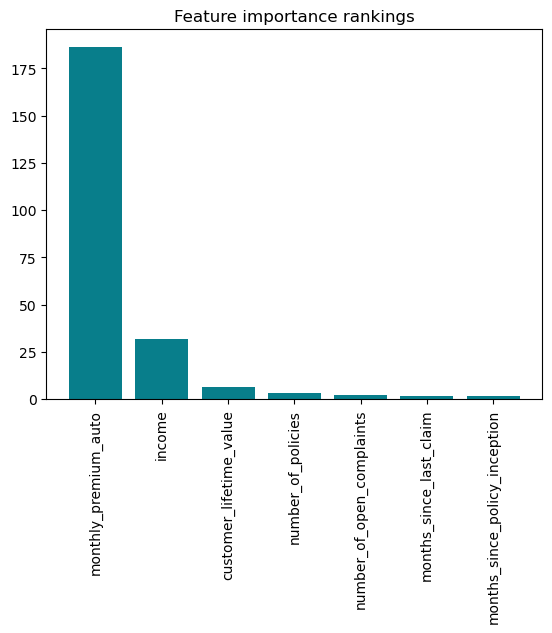

In [52]:
plt.bar(x=features_importances['Attribute'].iloc[:52], height=features_importances['Importance'].iloc[:52], color='#087E8B')
plt.title('Feature importance rankings', size=12)
plt.xticks(rotation='vertical')
plt.show()

## Data_PreProcessing_Feature_Selection

### Fitting the models - fit the models LinearRegression,Lasso and Ridge and compare the model performances.

### - Using Lasso Model

In [123]:
from sklearn.linear_model import Lasso,Ridge,ElasticNet, LinearRegression
model=Lasso(alpha=1)

model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

Lasso: Train -> 0.40865038611057114, Test -> 0.41190475415752137


### - Using Ridge Model

In [97]:
model=Ridge(alpha=1)
model.fit(X_train, y_train)
print(f"{model.__class__.__name__}: Train -> {model.score(X_train, y_train)}, Test -> {model.score(X_test, y_test)}")

Ridge: Train -> 0.4086665809854816, Test -> 0.4117569477220413


### -  Use feature selection techniques (P-Value, RFE) to select subset of features to train the model with(if necessary).


In [124]:
x = load_boston() # Boston home prices dataset from scikit learn
y = x.target # price
X = pd.DataFrame(x.data, columns = x.feature_names)

X_added_constant = sm.add_constant(X) # we need to add this constant for the intercept w/ OLS
X_added_constant # input features for linear regression use OLS

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,1.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,1.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,1.0,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,1.0,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,1.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [125]:
from sklearn.feature_selection import RFE  ## recursive feature elemination technique
from sklearn.linear_model import LinearRegression###drop the features that correlation is higher than the threshold value

lm = LinearRegression()##to calculate the feature importance

selector = RFE(lm, n_features_to_select= 8, step = 1, verbose = 1) # Step is how many features to add or drop everytime
selector.fit(X_train, y_train)

kept_features = selector.get_support(indices = True) #returns an array of integers corresponding to nonremoved features
kept_features = list(X_train.iloc[:,kept_features].columns)

X_train = selector.transform(X_train)
X_test  = selector.transform(X_test)

X_train = pd.DataFrame(X_train, columns=kept_features)
X_test  = pd.DataFrame(X_test, columns=kept_features)

print("Final selected features: ")
display(X_train)

Final selected features: 


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,5908,86277,74,19,33,0,3
1,2397,22283,65,16,93,0,1
2,5296,96510,73,33,44,0,3
3,16510,31356,68,25,13,0,2
4,6293,45430,81,21,37,0,8
...,...,...,...,...,...,...,...
7477,2476,47918,62,2,51,0,1
7478,9312,75986,115,11,44,0,3
7479,6945,15850,61,28,14,0,2
7480,8718,89096,111,1,50,0,3


In [126]:
X_added_constant = sm.add_constant(X) # we need to add this constant for the intercept w/ OLS
X_added_constant # input features for linear regression use OLS

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,1.0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,1.0,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,1.0,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,1.0,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,1.0,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,1.0,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,1.0,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [127]:
model = sm.OLS(y,X_added_constant).fit() # ordinary least squares regression model from statsmodels
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 01 May 2023   Prob (F-statistic):          6.72e-135
Time:                        17:06:26   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [128]:
alpha                = 0.05 # significance threshold
sig_param_names      = model.params[list(np.where(model.pvalues < alpha)[0])].iloc[0:].index.tolist() # list of names of signficant parameters
significant_features = X_added_constant[sig_param_names] # only select vars having p-value < 0.05
significant_features # print out the significant feature values

,const,CRIM,ZN,CHAS,NOX,RM,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.0,0.00632,18.0,0.0,0.538,6.575,4.0900,1.0,296.0,15.3,396.90,4.98
1,1.0,0.02731,0.0,0.0,0.469,6.421,4.9671,2.0,242.0,17.8,396.90,9.14
2,1.0,0.02729,0.0,0.0,0.469,7.185,4.9671,2.0,242.0,17.8,392.83,4.03
3,1.0,0.03237,0.0,0.0,0.458,6.998,6.0622,3.0,222.0,18.7,394.63,2.94
4,1.0,0.06905,0.0,0.0,0.458,7.147,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.06263,0.0,0.0,0.573,6.593,2.4786,1.0,273.0,21.0,391.99,9.67
502,1.0,0.04527,0.0,0.0,0.573,6.120,2.2875,1.0,273.0,21.0,396.90,9.08
503,1.0,0.06076,0.0,0.0,0.573,6.976,2.1675,1.0,273.0,21.0,396.90,5.64
504,1.0,0.10959,0.0,0.0,0.573,6.794,2.3889,1.0,273.0,21.0,393.45,6.48
